In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

get_ipython().magic(u'matplotlib inline')

def showfig(image, ucmap):
    plt.figure(figsize=(8,8))
    imgplot=plt.imshow(image, ucmap)

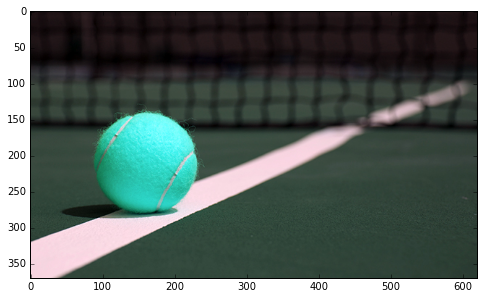

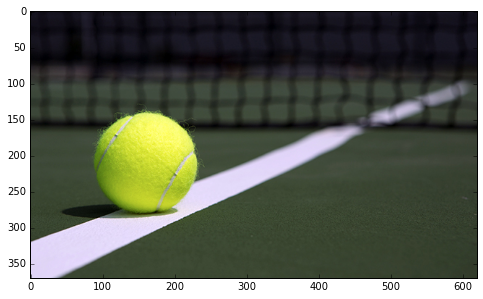

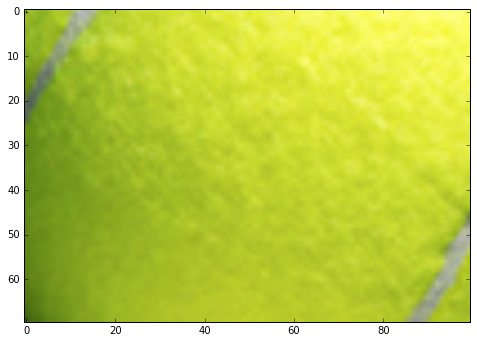

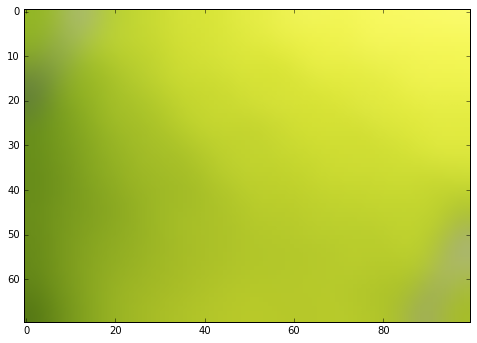

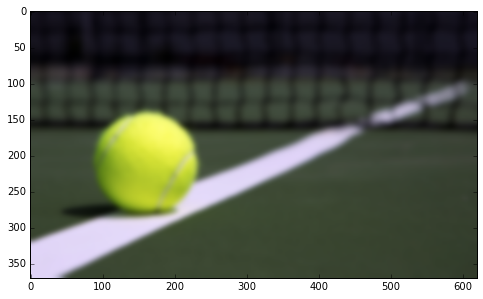

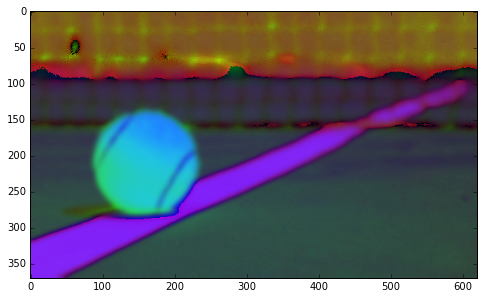

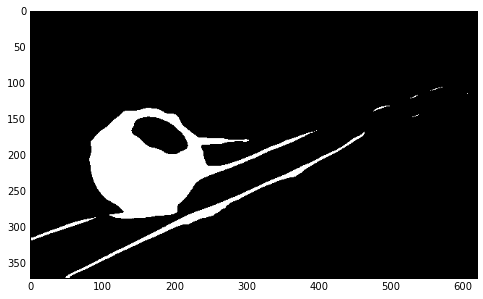

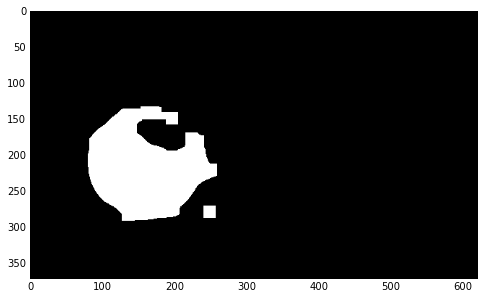

In [2]:
#Pre Processamento
image = cv.imread("tenisball.jpg")
showfig(image, "gray")
image = cv.cvtColor(image.copy(), cv.COLOR_BGR2RGB)
showfig(image, "gray")

roi = image[180:250, 100:200, :]
showfig(roi, "gray")

roi = cv.GaussianBlur(roi.copy(), (21,21), 0)
showfig(roi, "gray")

image = cv.GaussianBlur(image.copy(), (21,21), 0)
showfig(image, "gray")

image_hsv = cv.cvtColor(image.copy(), cv.COLOR_RGB2HSV)
showfig(image_hsv, "gray")

#upper_yellow = (39,210,255)
#lower_yellow = (30,100,100)
upper_yellow = (70,255,240)
lower_yellow = (30,5,78)
mask = cv.inRange(image_hsv, lower_yellow, upper_yellow)
showfig(mask, "gray")

#Open
kernel = np.ones((3,3),np.uint8)
mask = cv.erode(mask.copy(), kernel, iterations =5)

kernel = np.ones((3,3),np.uint8)
mask = cv.dilate(mask.copy(), kernel, iterations = 4)

#Close
kernel = np.ones((11,11),np.uint8)
mask = cv.dilate(mask.copy(), kernel, iterations = 2)

kernel = np.ones((5,5),np.uint8)
mask = cv.erode(mask.copy(), kernel, iterations = 3)

showfig(mask, "gray")

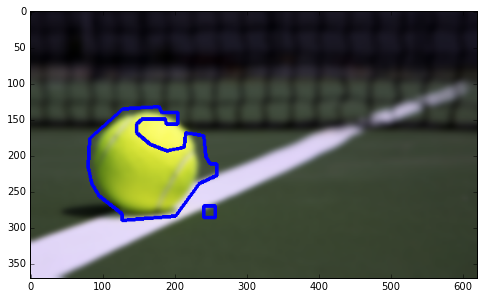

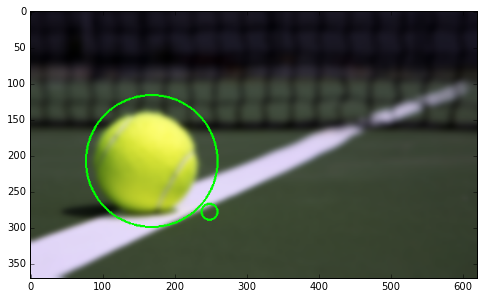

In [3]:
#Detecção

_, contours0, hierarchy  = cv.findContours(mask.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours = [cv.approxPolyDP(cnt, 3, True) for cnt in contours0]
imagedraw1 = image.copy()
cv.drawContours( imagedraw1, contours, -1, (0,0,255), 3)
showfig(imagedraw1, "gray")

imagedraw2 = image.copy()
circles = []
for c in contours:
    (x,y),radius = cv.minEnclosingCircle(c)
    center = (int(x),int(y))
    radius = int(radius)
    cv.circle(imagedraw2,center,radius,(0,255,0),2)
    circles.append( (center,radius) )
    
showfig(imagedraw2, "gray")

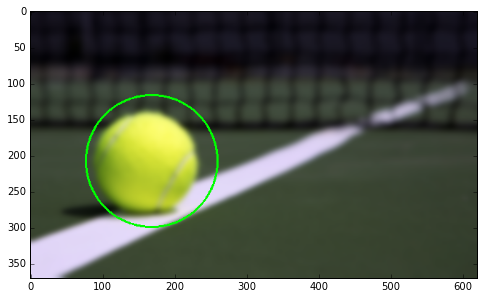

In [4]:
#Classificação
raioreal = 80
erro = 0
bestcircle = None
erroMin = 1000
for c in circles:
    erro = raioreal - c[1]
    if(erroMin > erro): 
        erroMin = erro
        bestcircle = c

imagedraw3 = image.copy()
cv.circle(imagedraw3,center,radius,(0,255,0),2)
showfig(imagedraw3, "gray")